In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

<b>Define scaled SIR model:</b>

In [101]:
count = 0
h1n1_data = pd.read_csv("C:\\Users\\tomas\\Downloads\\flu data.csv")
weeklyInfections = []
noneArray = [None,None,None,None,None,None]
for i in range(len(h1n1_data['TOTAL SPECIMENS'])):
    weeklyInfections.append(h1n1_data['total infections'][i])
    for j in range(6):
        weeklyInfections.append(None)

In [285]:
def SEIRHD(x,t, beta, gamma,mu, f_D, gamma_H, k, delta_c,D_c):
    S, E, I, R, H, D = x
    dD = gamma_H * H 

    dS = -(beta * S * I)/((1+ (dD/delta_c)**k) + (D/D_c)**k)
    dE = ((beta * S * I)/((1+ (dD/delta_c)**k)+ (D/D_c)**k)) - (mu * E)
    
    dI = (mu * E) - (gamma * I)
    dR = (1-f_D) * gamma * I
    dH = (f_D * gamma * I) - (gamma_H * H)


    dxdt = [dS,dE, dI, dR, dH, dD]
    return dxdt

<b>Set initial conditions:</b>

In [245]:
S0 = 9999996/10_000_000
E0 = 4/10_000_000
I0 = 0.
R0 = 0.
H0 = 0.
D0 = 0.

x0 = [S0,E0,I0,R0, H0, D0]

<b>Time span for solving the ODE:</b>

In [239]:
tmax = 52
nt = 10*tmax
t = np.linspace(0, tmax * 7, tmax * 7)


<b>Compute numerical solution to the ODE:</b>

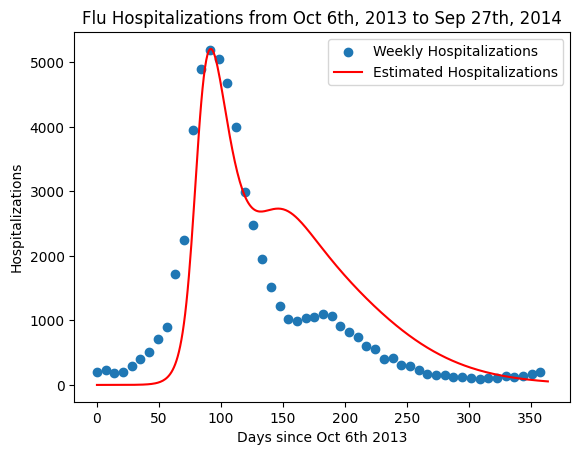

In [286]:
#set parameter values
beta = .43
f_D = .004
gamma = 1/6
gamma_H = 1/11
mu = 1/2
k = 2
delta_c = 108e-7
D_c = 16500e-7
hospitalizations_per_day = [0]
xout = odeint(SEIRHD, x0, t, args=(beta, gamma,mu, f_D, gamma_H, k, delta_c,D_c))
for i in range(len(t)-1):
    hospitalizations_per_day.append((xout[i+1,-1] - xout[i,-1]) * 300_000_000)

#plot graphs
plt.scatter(t,weeklyInfections, label = 'Weekly Hospitalizations')

plt.plot(t,hospitalizations_per_day, 'r', label = 'Estimated Hospitalizations')
plt.xlabel ('Days since Oct 6th 2013')
plt.ylabel ('Hospitalizations')
plt.title ('Flu Hospitalizations from Oct 6th, 2013 to Sep 27th, 2014')
plt.legend()
plt.show()